# **Task A: Data Wrangling and Analysis**

In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### **A1. Data Wrangling** 

#### 1. Read the ‘Student_List_A2.csv’ file and list the column names.

In [5]:
df = pd.read_csv('Student_List_A2.csv')
df.columns

Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport',
       'GPA', 'GradeClass'],
      dtype='object')

#### ANS: The column names are StudentID, Age, StudyTimeWeekly, Absences, ParentalSupport, GPA, GradeClasss.

In [7]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1


#### 2. In this dataset, ‘GradeClass’ column contains the classification of students' grades based on GPA. Replace the numerical grade classifications (0, 1, 2, 3, 4) in the ‘GradeClass’ column with their corresponding letter grades ('A', 'B', 'C', 'D', 'F').

In [9]:
grade = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'F',    
}
df['GradeClass'] = df['GradeClass'].replace(grade)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


#### 3. Can you identify any missing values in the columns of this dataset? If so, replace the missing values with the median value of the relevant column where you find missing values.

In [11]:
print("Number of missing values in the columns:\n", df.isna().sum())
# fillna() replace missing values (NaN) in df with the median value
# df.median() calculates the median for each column, numeric_only=True ensures only numeric columns are considered
# inplace=True, modifies df directly without needing to reassign it to another variable or itself.
df.fillna(df.median(numeric_only=True), inplace=True)
print("\nNumber of missing values in the columns after replace with the median value:\n", df.isna().sum())

Number of missing values in the columns:
 StudentID           0
Age                 0
StudyTimeWeekly    21
Absences            0
ParentalSupport     0
GPA                 0
GradeClass          0
dtype: int64

Number of missing values in the columns after replace with the median value:
 StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
GPA                0
GradeClass         0
dtype: int64


#### 4. Identify a data quality problem related to the ‘Absences’ column and delete the rows that exhibit this problem. Refer to Week 4 for information on data quality problems.

In [13]:
q1 = df['Absences'].quantile(0.25)
q3 = df['Absences'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

problem = df[(df['Absences'] < 0) | (df['Absences'] > upper_bound)]
print("Data quality problem related to the ‘Absences’ column:\n", problem)
df = df[(df['Absences'] >= 0) & (df['Absences'] <= upper_bound)]

Lower Bound: -15.5
Upper Bound: 44.5
Data quality problem related to the ‘Absences’ column:
       StudentID  Age  StudyTimeWeekly  Absences  ParentalSupport       GPA  \
112        1114   16        16.849282       320                1  1.919956   
1001       2003   15         0.806505      -122                3  3.201710   

     GradeClass  
112           F  
1001          B  


#### The data quality issue associated with the 'Absences' column arises from negative values representing absences, which is not logical, and extremely high values that fall outside the acceptable range for the number of absences. Identifying and removing records where the number of absences is less than zero or exceeds the upper bound of 44.5, to address the issue.

#### 5. Examine the 'GPA' and 'GradeClass' columns together for additional data quality issues. Propose an appropriate solution for these issues and resolve them.

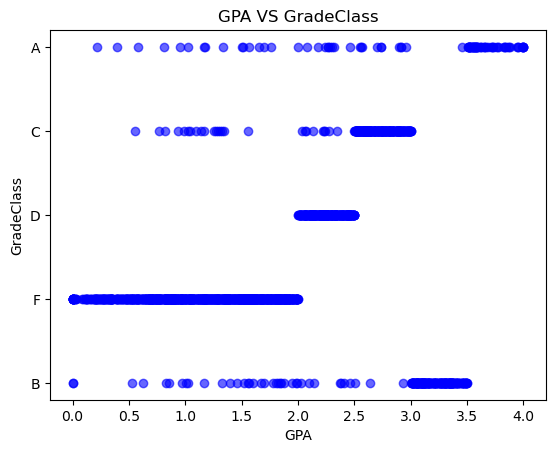

In [16]:
plt.scatter(df['GPA'], df['GradeClass'], color='blue', alpha=0.6)
plt.title('GPA VS GradeClass')
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.show()

#### From the scatter plot above, it is clear that there are data quality issues, specifically related to inconsistencies between GPA and GradeClass. For example, a GPA of 3.5 or higher should correspond to a GradeClass of 'A', but in some cases, this is not the case. Similar discrepancies exist for other GPA ranges and their corresponding grades. To correct this issue, I reorganized the data accordingly.

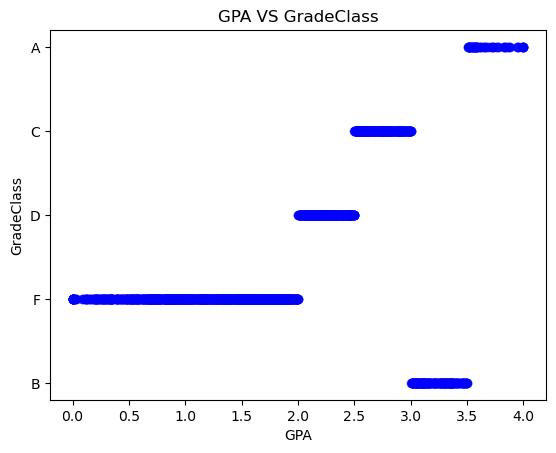

In [18]:
# filter all rows where the GPA >= 3.5 (boolean Series), targets the GradeClass column for those rows and assigns the value 'A'.
df.loc[df['GPA'] >= 3.5, 'GradeClass'] = 'A' 
df.loc[(df['GPA'] < 3.5) & (df['GPA'] >= 3.0), 'GradeClass'] = 'B'
df.loc[(df['GPA'] < 3.0) & (df['GPA'] >= 2.5), 'GradeClass'] = 'C'
df.loc[(df['GPA'] < 2.5) & (df['GPA'] >= 2.0), 'GradeClass'] = 'D'
df.loc[df['GPA'] < 2.0, 'GradeClass'] = 'F'
plt.scatter(df['GPA'], df['GradeClass'], color='blue', alpha=0.6)
plt.title('GPA VS GradeClass')
plt.xlabel('GPA')
plt.ylabel('GradeClass')
plt.show()

### **A2. Supervised Learning**

#### 1. Explain supervised machine learning, the notion of labelled data, and train and test datasets.

#### Supervised Machine Learning
Supervised learning is a machine learning method where algorithms are trained on a dataset with known labels, enabling them to predict outcomes based on input data. The objective is to learn a highly accurate mapping between input features (X) and the target variable (Y), so that the model can make predictions on new, unseen data. By identifying patterns in the input-output relationships, the goal is to create a model that generalizes well to both training and new data, whether the task involves classifying categories or predicting continuous values.

#### Labelled Data
Labeled data is a collection of examples where each instance is linked to a specific output or target value, providing the "answers" that a learning algorithm utilizes to understand the relationship between inputs and outputs. Accurate labeling is crucial for the success of supervised learning models, as errors in labeling can lead to incorrect learning and predictions.

#### Train dataset
This subset of labeled data is utilized to train the model, allowing it to learn from examples by establishing connections between input features and their corresponding labels.

#### Test dataset
This distinct subset of labeled data assesses the trained model's performance, providing insights into how well the model generalizes to new, unseen data.

#### 2. Use the wrangled data from A1 and separate the features and the label. Note that:
##### ● the label, in this case, is the ‘GradeClass’
##### ● studentID is not logically a useful predictor of a student's grade so should not be used as a feature
##### ● GPA is translated to GradeClass. They both represent the same thing so GPA should not be used as a feature.
##### ● Use the rest of the features as predictors.

In [23]:
y = df['GradeClass']
X = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])  # exclude GradeClass because a model cannot use the outcome it is trying to predict as an input feature.

#### 3. Use the sklearn.model_selection.train_test_split function to split your data for training and testing (Keep 80% of the data for training).

In [25]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing datasets
# X_train, y_train: contain 80% of the data and will be used for training the model.
# X_test, y_test: contain 20% of the data and will be used for testing the model's performance.
# test_size=0.2 specifies that 20% of the dataset should be set aside for the test set.
# random_state=0 ensure we get the same split of the dataset, which promotes reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **A3. Classification (training)**
#### 1. In preparation for classification, your data should be normalised/scaled.
##### a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).

Normalizing data is crucial in many machine learning algorithms because raw data often have significantly different value ranges, which can skew results. For instance, in distance based methods like K-means, features with broader ranges can disproportionately impact distance calculations, leading to an unbalanced influence. To ensure that all features contribute equally to distance measurements and to facilitate later visualization of the feature space for identifying patterns or clusters, it is essential to apply feature scaling or normalization to the dataset.

##### b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()
# fit on training data and transform it
X_train_scaled = sc.fit_transform(X_train)
# apply same scaler that fitted on the training data to transform the testing data.
X_test_scaled = sc.transform(X_test)

#### 2. Use the Support Vector Machine algorithm to build the model.
##### a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning.

Support Vector Machine (SVM) is a powerful supervised learning technique used mainly for classification, but also applicable to regression and outlier detection. The algorithm finds a hyperplane in an N-dimensional space that best divides classes of data. This hyperplane is selected to maximize the margin between the nearest data points of each class, known as support vectors. When the data cannot be linearly separated, SVM uses kernel functions like polynomial or RBF to project the data into a higher dimension where separation becomes feasible. SVM is commonly used in areas such as image recognition, text classification, and anomaly detection because it effectively handles both linear and complex data patterns.

##### b. In SVM, there is something called the kernel. Explain what you understand from it.

The kernel function in SVM is a method used to map data into a higher-dimensional space, making it possible to achieve linear separation of patterns that are not linearly separable in their original form. This process, referred to as the "kernel trick," bypasses direct computation in high dimensions by calculating inner products between the points. Different kernel types, like polynomial, RBF, and sigmoid, allow SVM to accommodate diverse data patterns, enabling the model to capture complex relationships and enhance its predictive performance.

##### c. Write the code to build a predictive SVM model using your training dataset. (Note: You are allowed to engineer or remove features as you deem appropriate)

In [35]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=0) 
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

#### 3. Repeat Task A3.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with a fixed random state for reproducibility.
random_forest_model = RandomForestClassifier(random_state = 0)

# Fit the Random Forest model on the scaled training data.
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

### **A4. Classification (prediction)**
#### 1. Using the testing dataset you created in Task A2.3 above, conduct the prediction for the ‘GradeClass’ (label) using the two models built by SVM and your other classification algorithm in Task A3.3.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# svm predictions
svm_predict = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predict)

# display svm accuracy
print("Accuracy of SVM for predicting the 'GradeClass' label: ", svm_accuracy)

# Random Forest predictions
rf_predict = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predict)

# display Random Forest accuracy
print("Accuracy of Random Forest for predicting the 'GradeClass' label: ", rf_accuracy)

Accuracy of SVM for predicting the 'GradeClass' label:  0.7595238095238095
Accuracy of Random Forest for predicting the 'GradeClass' label:  0.7380952380952381


#### 2. Display the confusion matrices for both models (it should look like a 5x5 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification problem setting.

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# SVM Confusion Matrix
svm_confusion_matrix = confusion_matrix(y_test, svm_predict)

# Display the confusion matrix
print("Confusion Matrix for SVM:")
print(svm_confusion_matrix)

# Random Forest Confusion Matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predict)

# Display the confusion matrices
print("\nConfusion Matrix for Random Forest:")
print(rf_confusion_matrix)

Confusion Matrix for SVM:
[[  0  18   0   0   0]
 [  0  19  23   1   0]
 [  0   9  40   9   1]
 [  0   0  13  46  19]
 [  0   0   0   8 214]]

Confusion Matrix for Random Forest:
[[  6  11   1   0   0]
 [  1  19  20   3   0]
 [  0  12  29  18   0]
 [  0   0  18  42  18]
 [  0   0   2   6 214]]


#### 3. Compare the performance of SVM and your other classifier and provide your justification on which one performed better.

In [43]:
svm_report = classification_report(y_test, svm_predict) 
rf_report = classification_report(y_test, rf_predict)

print("SVM Classification Report:\n", svm_report)
print("Random Forest Classification Report:\n", rf_report)

SVM Classification Report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00        18
           B       0.41      0.44      0.43        43
           C       0.53      0.68      0.59        59
           D       0.72      0.59      0.65        78
           F       0.91      0.96      0.94       222

    accuracy                           0.76       420
   macro avg       0.51      0.53      0.52       420
weighted avg       0.73      0.76      0.74       420

Random Forest Classification Report:
               precision    recall  f1-score   support

           A       0.86      0.33      0.48        18
           B       0.45      0.44      0.45        43
           C       0.41      0.49      0.45        59
           D       0.61      0.54      0.57        78
           F       0.92      0.96      0.94       222

    accuracy                           0.74       420
   macro avg       0.65      0.55      0.58       420
weighted av

C:\Users\baoyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\baoyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\baoyr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Performances Comparison and Justification**
**SVM Accuracy**: 0.7595238095238095

**Random Forest Accuracy**: 0.7380952380952381

In this comparison between Support Vector Machine (SVM) and Random Forest for predicting the 'GradeClass' label, SVM performs slightly better in terms of overall accuracy, achieving 0.76, while Random Forest achieves 0.74. 

Looking deeper into the classification report for SVM, this model's strength lies in its ability to maintain a strong balance between precision and recall, particularly with class 'F', where it achieved a near perfect F1-score of 0.94 and a recall of 0.96, meaning it accurately captures most of the 'F' labels. Additionally, SVM's strong performance in classifying class 'D' further emphasizes its capability to handle non linear decision boundaries, which might explain its more consistent performance across the board.

In contrast, Random Forest has a marginally lower accuracy. It handles minority classes better than SVM but has a slightly lower overall accuracy due to misclassifications in other categories. Although Random Forest generally avoids overfitting and can be more flexible, in this case, its ensemble structure did not offer a significant advantage over the more direct SVM approach, especially in the face of imbalanced class distribution.

Therefore, SVM demonstrates better overall performance, particularly in predicting the majority class, which heavily influences the overall accuracy, and stronger performance in handling both frequent and infrequent classes. 

### **A5. Independent evaluation**
#### 1. Read the Student_List_A2_Submission.csv file and use the best model you built earlier to predict the ‘GradeClass for the students in this file.
#### 2. Unlike the previous section in which you have a testing dataset where you know the ‘GradeClass’ and will be able to test for the accuracy, in this part, you don’t have a ‘GradeClass’ and you have to predict it and submit the predictions along with other required submission files.
##### ○ Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘StudentID and ‘GradeClass’. It should have a total of 162 lines (1 header, and 161 entries).
##### ○ Hint: you may need to apply some of the data wrangling steps in A1 to this new data file (i.e., Student_List_A2_Submission.csv), to prepare it for prediction.

In [46]:
df2 = pd.read_csv('Student_List_A2_Submission.csv')

# Apply the same data wrangling steps as before (similar to A1)
print("Number of missing values in the columns:\n", df2.isna().sum())
df2.fillna(df2.median(numeric_only=True), inplace=True)
#check data type
print("\nData types of each column:\n",df2.dtypes)

Number of missing values in the columns:
 StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
dtype: int64

Data types of each column:
 StudentID            int64
Age                  int64
StudyTimeWeekly    float64
Absences             int64
ParentalSupport      int64
dtype: object


In [47]:
X2 = df2.drop(columns=['StudentID']) 

X_scaled = sc.transform(X2) 

predictions = svm_model.predict(X_scaled)

output = pd.DataFrame({
    'StudentID': df2['StudentID'], 
    'GradeClass': predictions
})
output.to_csv('Predicted_GradeClass.csv', index=False)

# Output a message indicating that the file has been saved
print("\nPredictions saved to 'Predicted_GradeClass.csv': \n", output)


Predictions saved to 'Predicted_GradeClass.csv': 
      StudentID GradeClass
0         5000          F
1         5001          C
2         5002          F
3         5003          D
4         5004          C
..         ...        ...
156       5156          D
157       5157          F
158       5158          F
159       5159          C
160       5160          F

[161 rows x 2 columns]


# **Task B: Selection of Dataset, Clustering and Video Preparation**
### **B1. Selection of a Dataset with missing data and Clustering**
#### 1. Select a suitable dataset that contains some missing data and at least two numerical features. Please note you cannot use the same data set used in the applied sessions/lectures in this unit. Please include a link to your dataset in your report. You may wish to:
##### ● provide the direct link to the public dataset from the internet, or
##### ● place the data file in your Monash student - google drive and provide its link in the submission.

**Input dataset:** [Worldwide Average IQ Levels](https://www.kaggle.com/datasets/abhijitdahatonde/worldwide-average-iq-levels)

Performing k-means clustering to **education_expenditure** and **IQ**.

education_expenditure: The amount of money spent on education in the country. In US dollar.

IQ: The average IQ in the country. 

In [50]:
from sklearn.cluster import KMeans

df3 = pd.read_csv('IQ_level.csv')
df3.head(), df3.columns

(   rank     country   IQ  education_expenditure  avg_income  avg_temp
 0     1  Hong Kong   106                 1283.0     35304.0      26.2
 1     2       Japan  106                 1340.0     40964.0      19.2
 2     3   Singapore  106                 1428.0     41100.0      31.5
 3     4     Taiwan   106                    NaN         NaN      26.9
 4     5       China  104                  183.0      4654.0      19.1,
 Index(['rank', 'country', 'IQ', 'education_expenditure', 'avg_income',
        'avg_temp'],
       dtype='object'))

#### 2. Perform wrangling on the dataset to handle/treat the missing data and explain your procedure.

In [52]:
print("Number of missing values in the columns:\n", df3.isnull().sum())
df3 = df3.dropna(subset=['education_expenditure'])

Number of missing values in the columns:
 rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64


#### In this scenario, we focus on clustering the countries based on their education expenditure and average IQ level. Missing values for these critical features would impede the clustering process, as the algorithm cannot function with incomplete data. Dropping these rows ensures the integrity of the data used for clustering, allowing for accurate groupings.

#### 3. Perform k-means clustering, choosing two numerical features in your dataset and create k clusters using Python (k>=2).

In [55]:
# scale data
sc = StandardScaler()
scaled_data = sc.fit_transform(df3[['education_expenditure', 'IQ']])

# perform KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

C:\Users\baoyr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 4. Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.

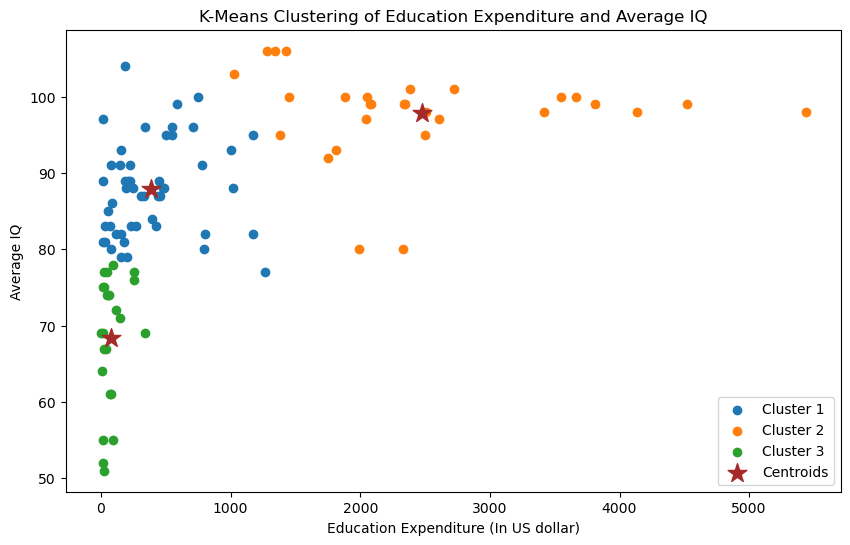

In [57]:
plt.figure(figsize=(10, 6))
data = sc.inverse_transform(scaled_data)
centroids = sc.inverse_transform(kmeans.cluster_centers_)

# Visualize the data points with the cluster labels
for label in set(kmeans.labels_):
    plt.scatter(
        data[kmeans.labels_ == label, 0],  # education_expenditure
        data[kmeans.labels_ == label, 1],  # IQ
        label=f'Cluster {label+1}'  # Label for the cluster
    )
    
# Visualize the cluster centers (black stars)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    color='brown', 
    marker='*', 
    s=200,  # marker size
    label='Centroids'
)

# Set labels and title
plt.xlabel('Education Expenditure (In US dollar)')
plt.ylabel('Average IQ')
plt.title('K-Means Clustering of Education Expenditure and Average IQ')
plt.legend()

plt.show()

### **Observation and Analysis**

**Cluster 3 (Green):**

This cluster consists of countries with both lower education expenditure and notably low average IQ scores, with the lowest average IQ recorded in this group, often below 80. These countries tend to have very less educational spending (less than 1000 US dollars), indicating that there is a correlation between low spending on education and lower average IQ. Countries in this cluster with limited resources for education are likely affects their citizens' IQ.

**Cluster 1 (Blue):**

This cluster is characterized by countries with relatively low education expenditure, from as low as 0 to 1000 US dollars. Despite this variability in spending, the average IQ for countries in this cluster is mostly above 80. The broad range of spending suggests that even with low education expenditure, there is a substantial number maintain a relatively high average IQ. This indicates that factors beyond direct education expenditure such as cultural, may contribute to maintaining higher IQ levels in these countries.

**Cluster 2 (Orange):**

Countries in this cluster have significantly higher education expenditures, typically above 1000 US dollars, and in some cases over 4000 US dollars.
The average IQ of countries in this cluster is high, mostly above 90. Additionally, the highest average IQs are found in this cluster.
This cluster suggests the clear relationship between higher education expenditure and higher IQ, which means investment in education directly contributes to average IQ level. 

**Centroids (Brown):**

The star markers represent the centroids of each cluster, which are the average values of the clusters.

**Overall:**

In conclusion, the clustering highlights the impact of spending on education, with higher expenditure generally leading to higher IQs (as seen in Cluster 2). Cluster 3 demonstrates this conclusion, minimal investment in education leads to lower IQs. However, it also reveals that other factors may influence IQ apart from education expenditure alone (Cluster 1). Therefore, this shows that a higher investment in education is significant to improve average IQ level but a various approach beyond just increasing educational investment is also crucial.